In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [ ]:
df = pd.read_csv("/content/spam.csv")
df.shape

(5572, 5)

In [ ]:
df['spam'] = df['v1'].apply(lambda x: 0 if x == "ham" else 1)

In [ ]:
df = df.drop(['v1','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)


In [ ]:
df.head()

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df.isnull().sum()

v2      0
spam    0
dtype: int64

In [ ]:
df.describe(include=object).T

,count,unique,top,freq
v2,5572,5169,"Sorry, I'll call later",30


In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(keep='first',inplace=True)

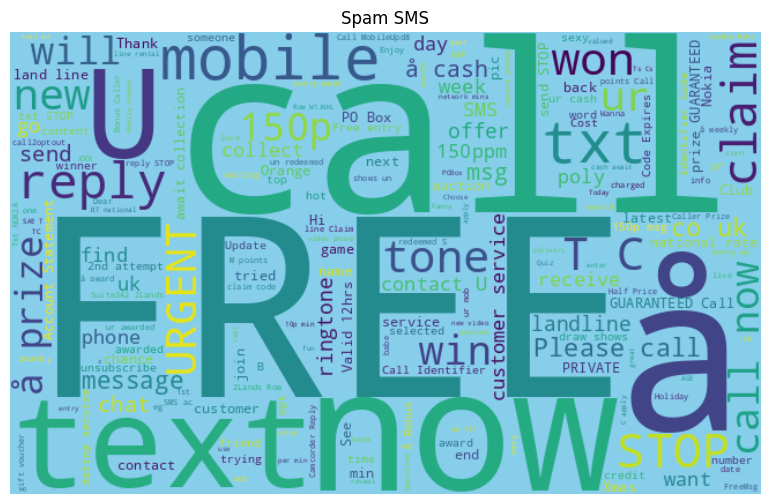

In [ ]:
spam_df = df[df['spam'] == 1]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=650, height=400, background_color='skyblue').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam SMS')
plt.show()

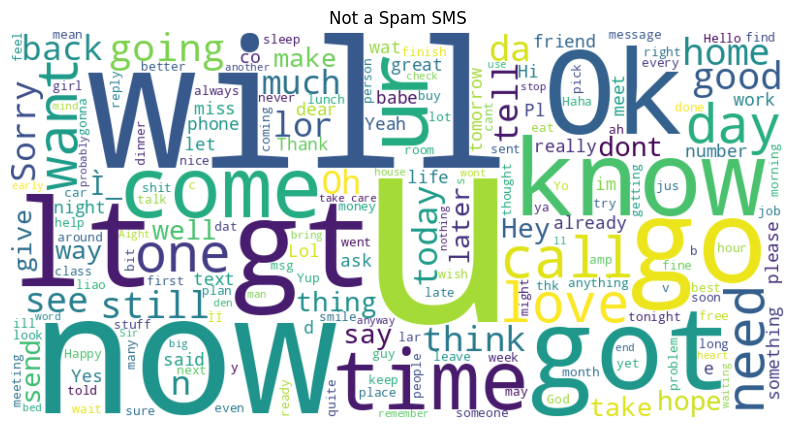

In [ ]:
spam_df = df[df['spam'] == 0]
spam_text = ' '.join(spam_df['v2'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Not a Spam SMS')
plt.show()

In [ ]:
X , y = df['v2'] ,df['spam']

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have loaded your data into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train and X_test
print(len(X_train))
print(len(X_test))


4135
1034


In [ ]:
vectorizer = TfidfVectorizer(stop_words="english",max_df=0.7)
X_train_vertorized = vectorizer.fit_transform(X_train)
X_test_vertorized = vectorizer.transform(X_test)

In [ ]:
clf = LinearSVC()
clf.fit(X_train_vertorized,y_train)


LinearSVC()

In [ ]:
y_pred = clf.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred))
print()
print("precision score: ", precision_score(y_test, y_pred))

accuracy Score:  0.9825918762088974

confusion matrix: 
[[887   2]
 [ 16 129]]

precision score:  0.9847328244274809


In [ ]:
data_frame = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
data_frame

,actual,predicted
1617,0,0
2064,0,0
1272,0,0
3020,0,0
3642,0,0
...,...,...
4146,0,0
1208,0,0
4795,1,1
3575,0,0


Text(0.5, 1.0, 'Model Performance')

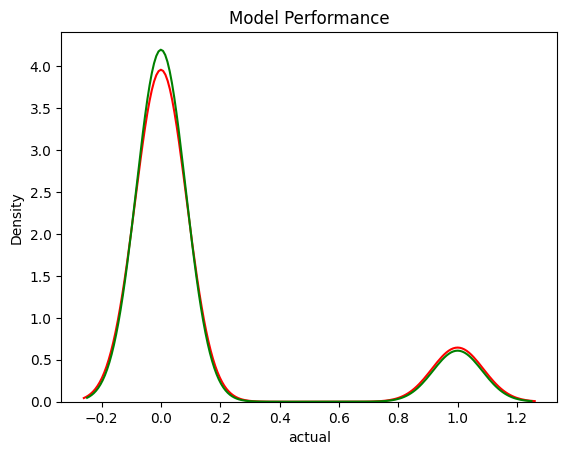

In [ ]:
ax = sns.kdeplot(data_frame['actual'], color='r', label='Actual Price')
sns.kdeplot(data_frame['predicted'], color='g', label='Predicted Price', ax=ax)
plt.title("Model Performance")

In [ ]:

rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train_vertorized,y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [ ]:
xgb = XGBClassifier(n_estimators=50,random_state=2)
xgb.fit(X_train_vertorized,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [ ]:

y_pred2 = rfc.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.9729206963249516

confusion matrix: 
[[889   0]
 [ 28 117]]

precision score:  1.0


In [ ]:

y_pred1 = xgb.predict(X_test_vertorized)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))

accuracy Score:  0.971953578336557

confusion matrix: 
[[887   2]
 [ 27 118]]

precision score:  0.9833333333333333


In [ ]:
with open("mytext.txt","w") as fl:
    fl.write(X_test.iloc[2])

In [ ]:
with open("mytext.txt","r") as fl:
    text = fl.read()

text

'Ok...'

In [ ]:
vector_text = vectorizer.transform([text])

In [ ]:
clf.predict(vector_text)


array([0])

In [ ]:
y_test.iloc[2]

0